Title: **Predicting Newsletter Subscription based on Player Characteristics**

Author: Helena Wu 

Student Number: 73311193

**Introduction**

The UBC Computer Science research team is running a Minecraft server to study how people interact within digital environments. To grow their research efforts, the team is interested in understanding what kinds of players are more likely to subscribe to their game-related newsletter. This insight will help them better target recruitment and engagement strategies. The question this report aims to study is: Can player characteristics and gameplay behaviour (such as experience level, playtime, age, and session activity) predict whether a player will subscribe to a game-related newsletter?

The analysis within this report uses two datasets:
`players.csv` and `sessions.csv`.

The `players.csv` dataset contains observations from 196 players and includes information such as name, hashed email, gender, age, experience level and whether the player subscribed.

**Variables within the players.csv dataset**:
  | Variable        | Type    | Description                                  |
  |-----------------|---------|----------------------------------------------|
  | experience      | Categorical  | Player’s self-described skill level |
  | subscribe       | Logical      | If the player subscribed to the newsletter or not        |
  | hashedEmail     | Character    | Player identifier |
  | played_hours    | Numeric      | Player’s total hours played              |
  | name            | Character    | Player’s chosen in-game name                             |
  | gender          | Categorical  | Gender ( Male, Female, Other)          |
  | Age             | Numeric      | Age in years                                            |

The `sessions.csv` dataset contains 1535 play session records, such as start and end times.
**Variables within the sessions.csv dataset**:
  | Variable             | Type    | Description |
  |----------------------|---------|-------------|
  | hashedEmail          | Character | Player identifier    |
  | start_time           | Character  | Start timestamp |
  | end_time             | Character  | End timestamp   |
  | original_start_time  | Numeric    | Start time in milliseconds |
  | original_end_time    | Numeric    | End time in milliseconds    |


Libraries:

In [9]:
#please run the code below to attach the following libraries
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(lubridate)
library(janitor)

Loading the Data:

In [13]:
players_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


Processing the Data :
After loading the data, we can see the following issues within the data that need to be fixed:
- the 'hashedEmail' column should be removed to preserve anonymity (but is needed to join 'players.csv' and 'sessions.csv' tables together.
- some session_count observations data is missing (these are excluded from the analysis)
- Session timestamps are in milliseconds and need to be converted

Additioanlly, we need to calculate the following variables:
 | Derived Variable      | Type    | Description|
|------------------------|---------|--------    |
| session_count         | Numeric | Number of sessions per player|
| total_session_duration    | Numeric | Sum of all session durations per player|

**Wrangling**

To answer the question if player characteristics and gameplay behaviour can predict whether a player will subscribe to a newsletter, we want to summarize the sessions data to find useful player behaviors such as session count and total play time.

In [72]:
sessions_data_clean <- sessions_data |>
mutate(session_duration = (original_end_time - original_start_time)/1000/60) |>
filter(session_duration > 0) |>
group_by(hashedEmail) |>
summarise(session_count = n() , 
          total_session_time = sum(session_duration, na.rm = TRUE))

sessions_data_clean

hashedEmail,session_count,total_session_time
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1,166.6667
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,4,666.6667
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1,166.6667
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,6,1000.0000
22a78bfd44e46931261d06864b92cf9a8fd77fb02bec66cb71646dd9da222a0d,1,166.6667
⋮,⋮,⋮
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,60,10666.6667
fb0005032363ec3b30c2ae668f78f5076b7e77de0c6a249e924eee608cd0a1fa,2,333.3333
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,166.6667




**Merging and Cleaning Player Data:**
- the `sessions_data_clean` and `players_data` datasets are merged
- `na`'s are dropped and not included within the dataset
- hashed_email and name is removed to remove player identifiers
- adjust the `subscribe` column to answer either YES or NO (rather than TRUE or FALSE)

In [74]:
merged_data <- players_data |>
  left_join(sessions_data_clean, by = "hashedEmail") |>
  clean_names() |>
  drop_na(experience:total_session_time) |>
  select(-hashed_email, -name) |>
mutate(subscribe = recode(as.character(subscribe), `TRUE` = "YES", `FALSE` = "NO"))
merged_data

experience,subscribe,played_hours,gender,age,session_count,total_session_time
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>
Pro,YES,30.3,Male,9,12,2000.0000
Veteran,YES,3.8,Male,17,1,166.6667
Amateur,YES,48.4,Female,17,18,3000.0000
Regular,YES,0.3,Male,8,1,166.6667
Amateur,YES,1.8,Male,23,1,166.6667
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Beginner,NO,1.8,Male,32,1,166.6667
Veteran,NO,2.7,Non-binary,21,1,166.6667
Amateur,NO,2.1,Male,24,1,166.6667


**Data Analysis:** #RETURN TO THIS AND WRITE DESCRIPTION

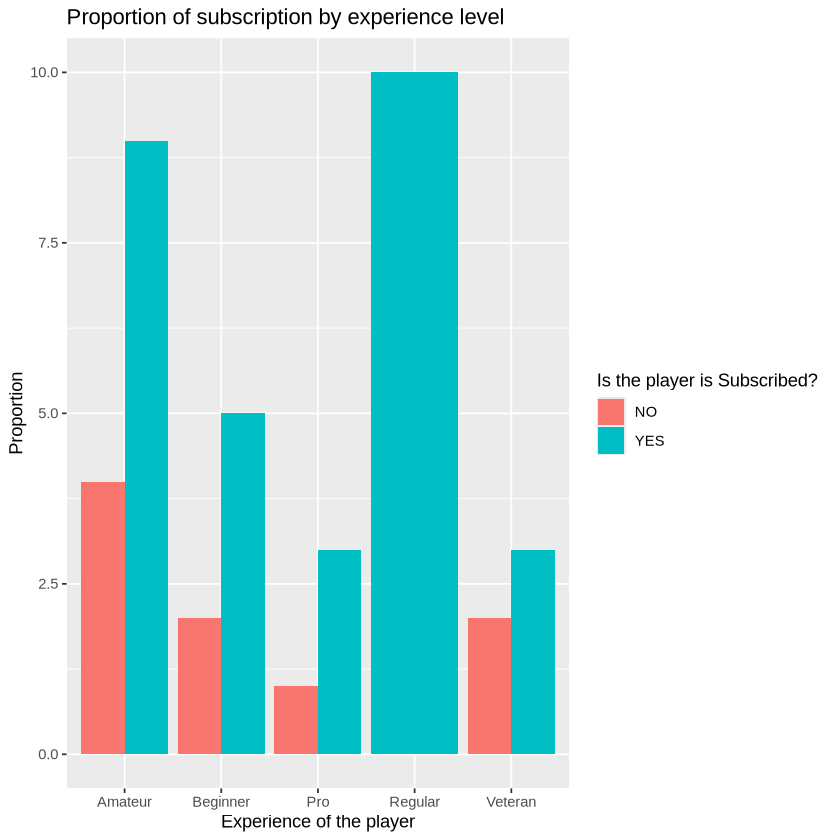

In [77]:
experience_plot <- merged_data |>
ggplot(aes(x=experience, fill = subscribe)) +
geom_bar(position = position_dodge()) +
labs(fill = "Is the player is Subscribed?") +
xlab("Experience of the player") + 
ylab("Proportion") +
ggtitle("Proportion of subscription by experience level")

experience_plot

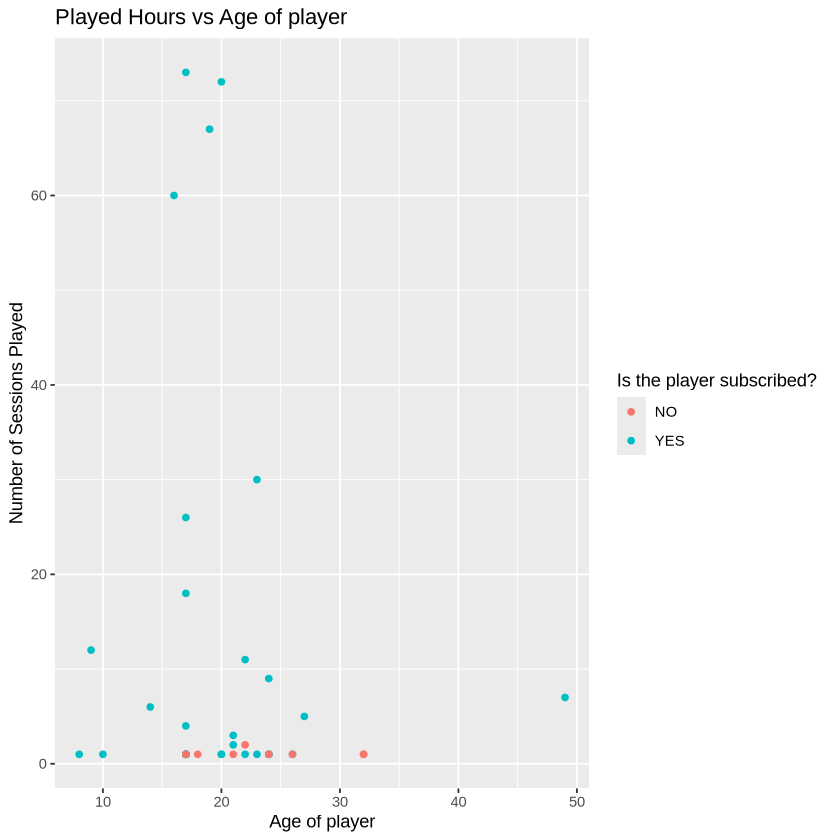

In [81]:
hours_played_plot <- ggplot(merged_data, aes(x = age, y = session_count, color = subscribe)) +
  geom_point() +
xlab("Age of player") +
ylab("Number of Sessions Played") +
labs(color = "Is the player subscribed?") +
ggtitle("Played Hours vs Age of player")
hours_played_plot